# 결측치 & 누락값 & 이상치

### 데이터 분석에서 결측치와 누락값은 정말 중요한 포인트
- 결측치 : 실제 Na값이지만 진짜 Na값일 수 있음 (결측치가 정말 순수하게 결측치인지 아니면 Na값 자체인지 확인)
- 누락값 : 휴먼에러로 인한 누락값, 어떤 이유로 누락 되었는지?

- 결측치와 누락값의 공통적인 부분 : 값이 없음 (Na, NaN 데이터)    

### 결측치 누락값을 처리하는 이유
- 분석에 방해가 된다. 진짜 Na값이면 방해보다는 인사이트가 될 수 있음
- na값을 -> 머신에게 학습시키기 위해 처리

### Na값이 중요한 이유
- ex) 시험 성적 데이터가 [100,50,60,30,50,30] 이라고 할때 이 데이터를 알고 평균을 알 수 있지만
      중간 값이 누락되어 [100,50,x,x,50,30]처럼 누락이 될 경우
      x값인 누락값이 실제의 값과 가장 유사하게 대입되면 가장 실제값과 예측값이 같아지는 것

- 결측치가 정말 중요하고 단순하게 접근해야 할 그런 범위는 아님
- 결측치를 실제값과 유사하지 않게 적을 경우 차이가 발생하고 모델의 성능에 영향을 미침

### 결측치를 처리하는 방법
- 1. 가장 간단하게 날림. 버림
    - 결측치를 날리는 기준? 결측치가 전체 비중에 1%미만인 경우 쉽게 날림. 하지만 절대값에 따라 달라질 수 있음
- 2. 결측치가 상당한 비중을 차지하는 경우? 전체 데이터 셋 컬럼에서 30% or 40% 결측치가 있을때
     - 다 날릴 경우 머신에게 학습할 데이터 양이 줄어듬
     - 성능에 영향을 미칠 수 있음
     - 결측치를 최대한 채워서 메꾸는 형식 생각
- 3. 너무 데이터가 다 결측치면 날려도 상관 없음 (80~90%), 다 결측치 컬럼이면 비즈니스적인 이해관계를 보고 도메인 지식 이용해서 날려야함
     - 결측치를 채울 수 없는 경우
     
- 결측치는 단순하게 생각하는 것이 아닌 정말 다양하게 고민하고 도메인, 통계적으로 다방면 고민해야함

### 결측치를 나타내는 용어
- 완전 무작위 결측치 MCAR (MIssing Completely At Random) 완전 무작위 -> 어떤 인간의 편향이나 기계 결함이 아니라 완전 무작위 랜덤한 것
- 무작위 결측 MAR (Missing At Random) 어떤 상황으로 인해서 발생하는 경우, 기업에서 제조과정에서 A제조공정, B제조공정 중 A가 갑자기 문제가 발생해 결측치가 발생 (A공정에서만 문제가 발생한 결측치)
- 비무작위 결측 NAMR (Missing At Not Random) 결측값인데 정말 Na가 하나의 특성이 될 수 있음

### 결측치 처리 방법
- 결측치 날리고 제외하고 진행
- 평균, 중위값 등등 어떤 특정 통계 값으로 대체
- 보간법 (interpolation)
- 대부분 보간법에 좀 많은 시간 보낼 예정
- 선형보간 Spline 보간법, time 시계열 보간법 등등

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [11]:
# 데이터 불러와서 결측치 확인
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
# 결측치 시각화
df = pd.read_csv('bike_sharing_daily.csv')
dfe = pd.read_csv('country_timeseries.csv')

In [21]:
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

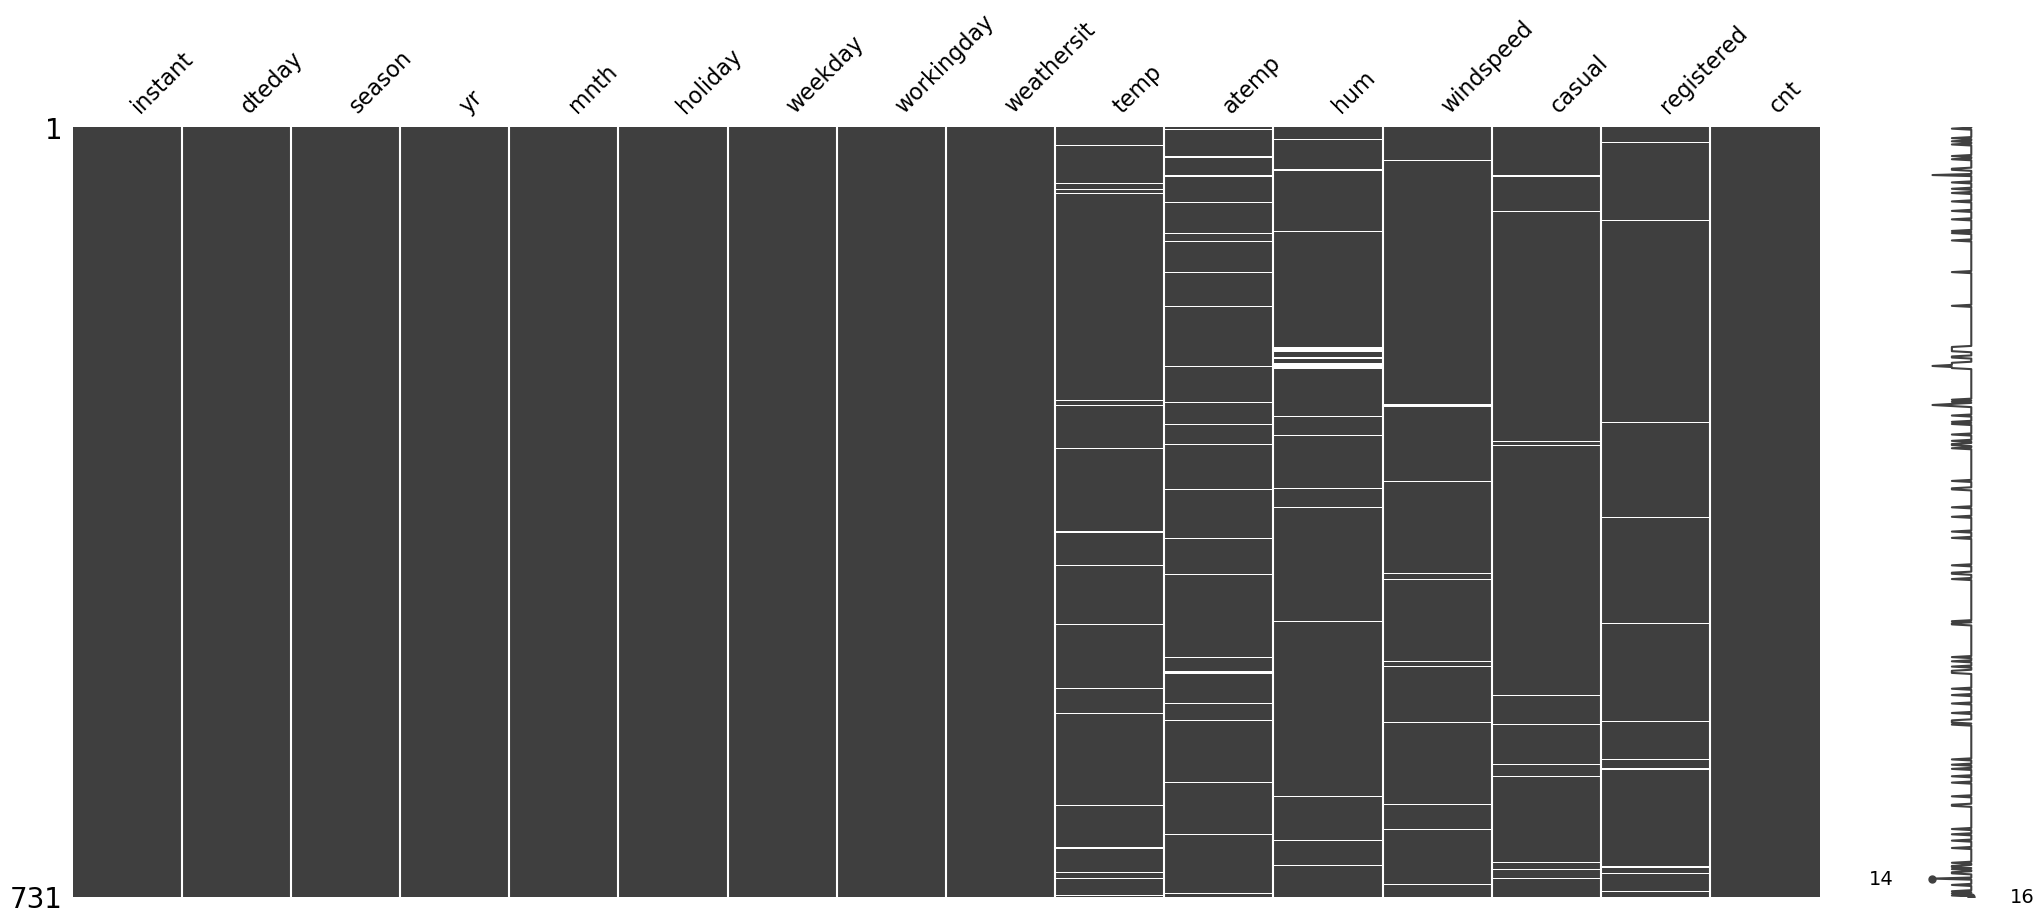

In [22]:
# 결측치 시각화
msno.matrix(df)
plt.show()

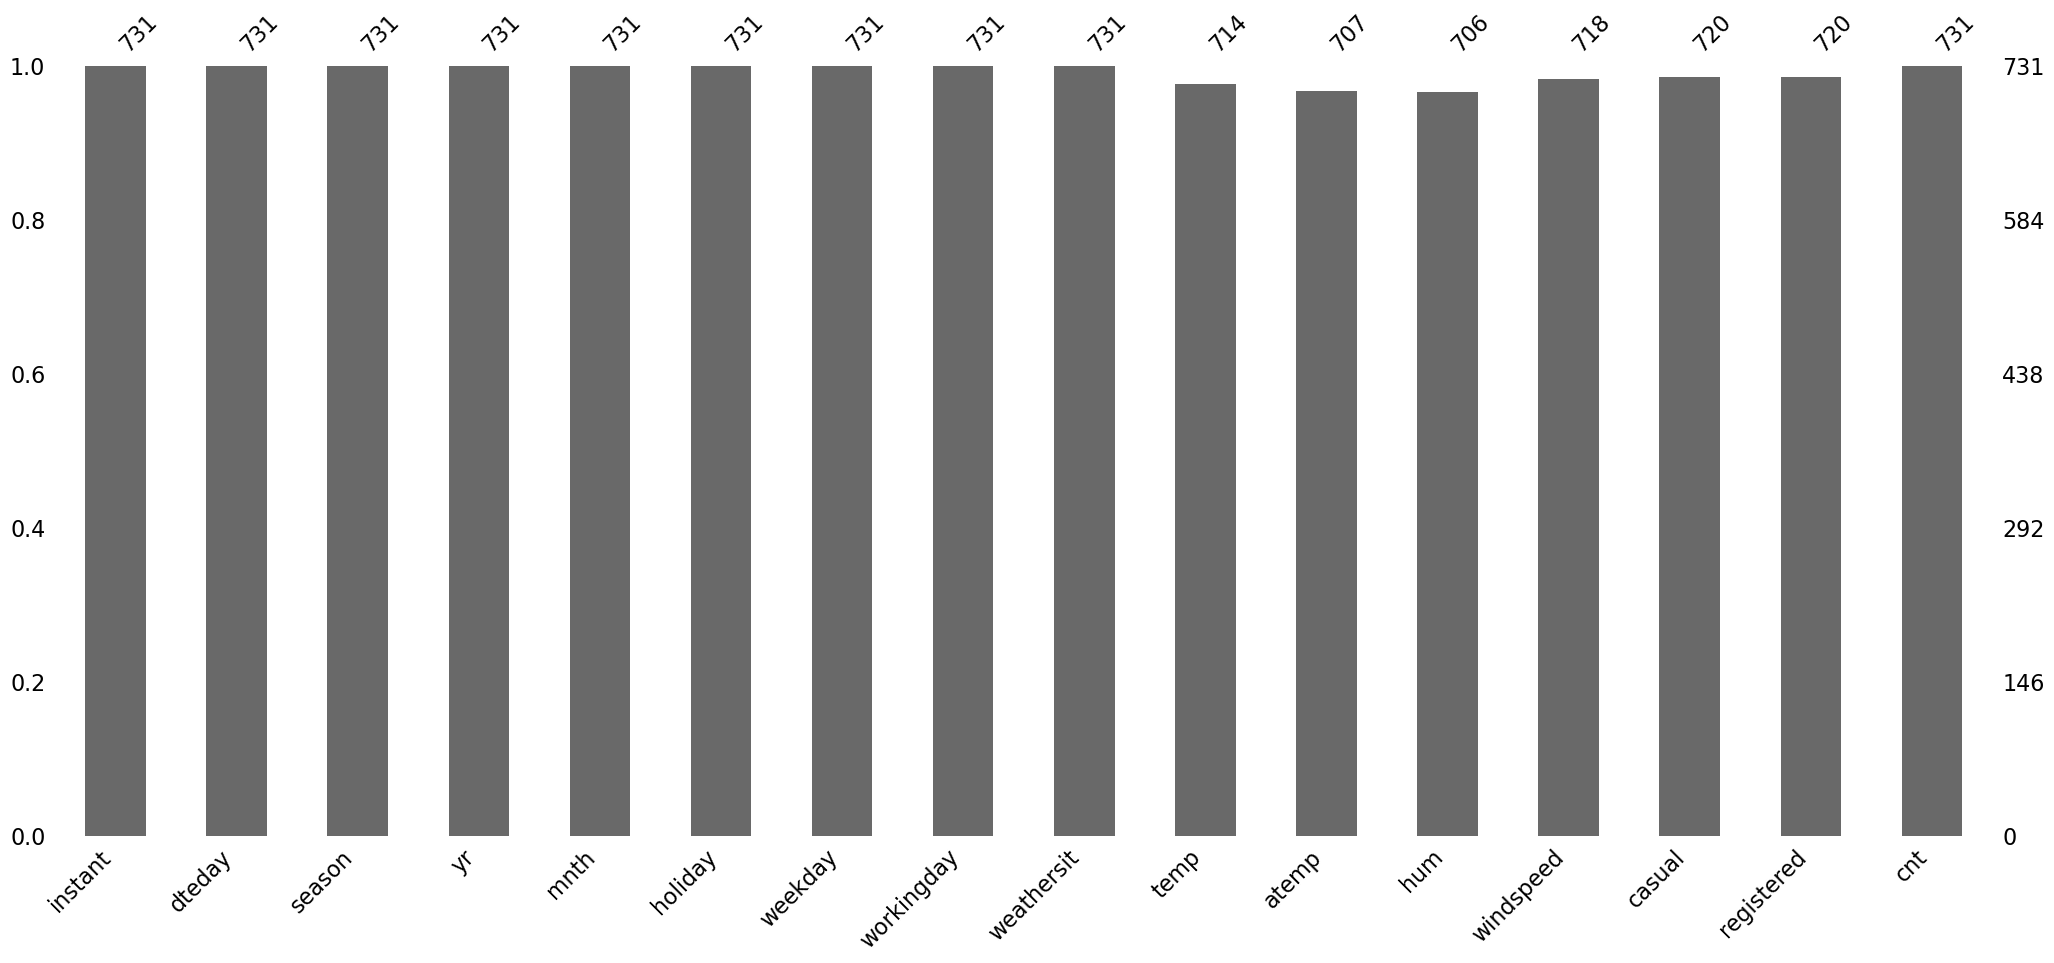

In [23]:
msno.bar(df)
plt.show()

In [24]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


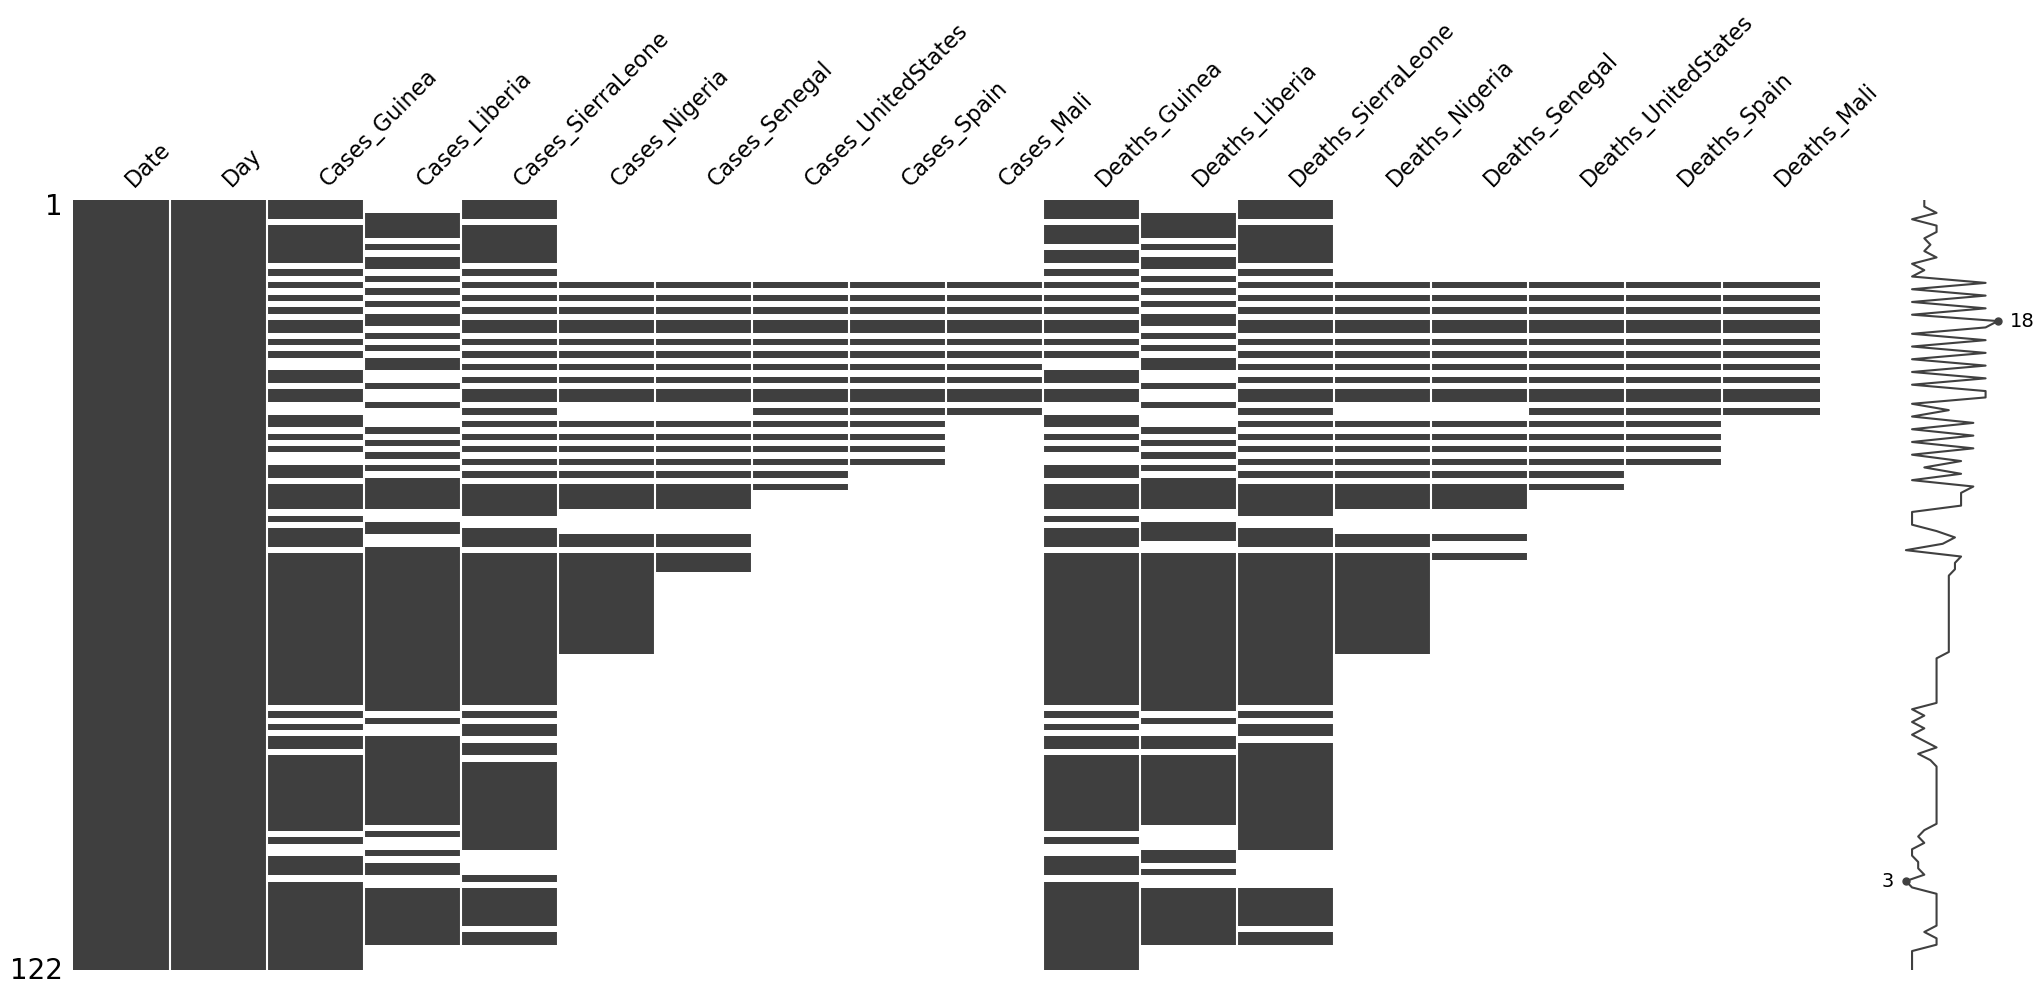

In [25]:
msno.matrix(dfe)
plt.show()

### 결측치를 대체하는 방법
- 샘플 데이터만 뽑아서 어떤 식으로 작동하는지 확인

In [29]:
# 결측치가 어떤식으로 변화하는지 확인
ebola = dfe.iloc[0:15,0:5] #ebola라는 변수에 데이터 넣음

In [30]:
ebola.dropna() #데이터가 깔끔하게 정리되지만 대부분 사라짐

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [31]:
ebola['Cases_Liberia'].mean()

7960.111111111111

In [32]:
ebola['Cases_Liberia'].fillna(7960.111111111111).to_frame()
# 결측치에 평균값 입력, 원본데이터에 저장 X

,Cases_Liberia
0,7960.111111
1,7960.111111
2,8166.000000
3,8157.000000
4,8115.000000
5,8018.000000
6,7960.111111
7,7977.000000
8,7960.111111
9,7862.000000


In [34]:
ebola['Cases_Liberia'].fillna(0).to_frame()
# 결측치에 0 입력, 원본데이터에 저장 X

,Cases_Liberia
0,0.0
1,0.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,0.0
7,7977.0
8,0.0
9,7862.0


- ffill -> 누락값이 나타나기 전의 값으로 누락값을 변경
- bfill -> 누락값이 나타나지만 이후의 첫 번째 값으로 앞쪽의 누락값을 변경

In [36]:
ebola['Cases_Liberia'].fillna(method='ffill').to_frame()
# ffill을 사용해 누락값이 나타나기 전의 값으로 누락값 변경

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,8018.0
7,7977.0
8,7977.0
9,7862.0


In [37]:
ebola.Cases_Liberia.to_frame()

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,NaN
7,7977.0
8,NaN
9,7862.0


In [38]:
ebola['Cases_Liberia'].fillna(method='bfill').to_frame()
# bfill을 사용해 누락값 이후의 첫 번째 값으로 변경

,Cases_Liberia
0,8166.0
1,8166.0
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7977.0
7,7977.0
8,7862.0
9,7862.0


- 보간법 (interpolation)
    - interpolate(method='')
    - 결측치 값을 대체하는 역할
    - 누락값 사이의 값을 평균으로 대체해서 만듬. 중간에 결측치가 있다면 보간법을 사용해 결측치를 대체

In [39]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [40]:
ebola['Cases_Liberia'].interpolate().to_frame()
# 결측치가 중간에 있는 값들은 누락값 사이의 값을 평균으로 대체해서 넣음

,Cases_Liberia
0,NaN
1,NaN
2,8166.0
3,8157.0
4,8115.0
5,8018.0
6,7997.5
7,7977.0
8,7919.5
9,7862.0


In [42]:
ebola['Cases_Liberia'].interpolate(method='asdfasdf').to_frame()

ValueError: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'asdfasdf' instead.

### 보간법 사용방법
['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

<Axes: >

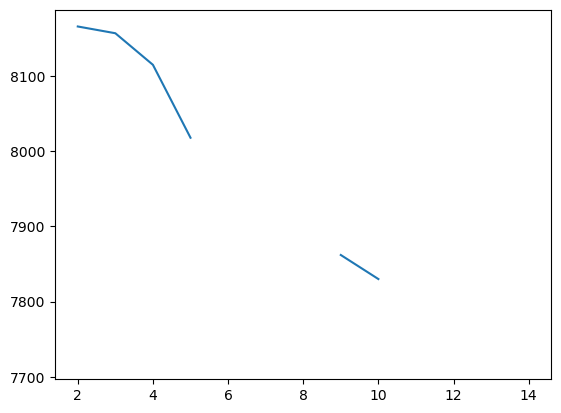

In [43]:
ebola['Cases_Liberia'].plot()

<Axes: >

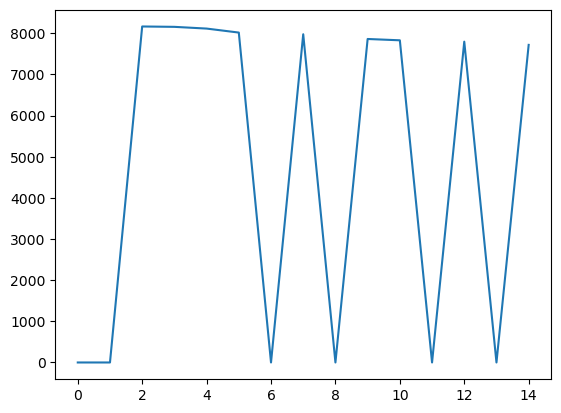

In [44]:
ebola['Cases_Liberia'].fillna(0).plot()
# 0 삽입

<Axes: >

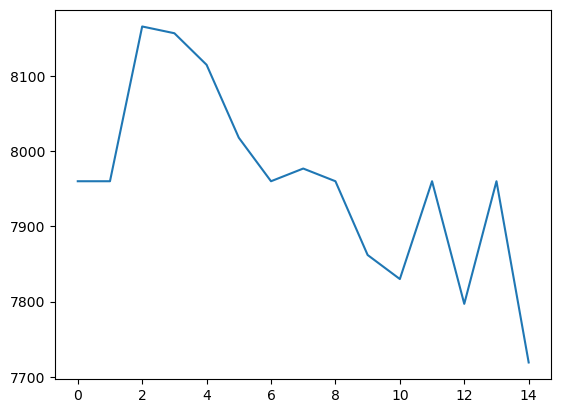

In [45]:
ebola['Cases_Liberia'].fillna(7960.111111111111).plot()
# 평균값 삽입

###선형 보간법
- 두 점사이의 거리 구하는 공식
- 차원 두 점사이의 거리로 해당 누락값을 대체함

<Axes: >

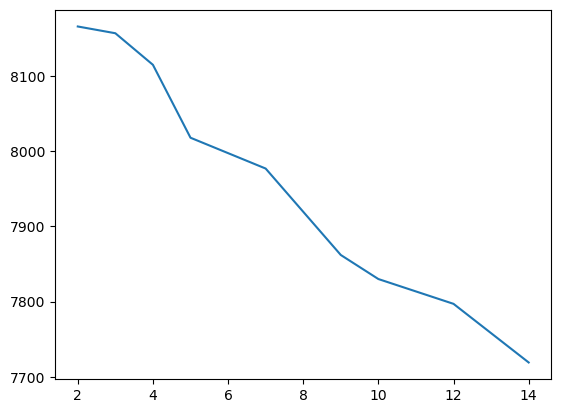

In [46]:
ebola['Cases_Liberia'].interpolate(method='linear').plot()

<Axes: >

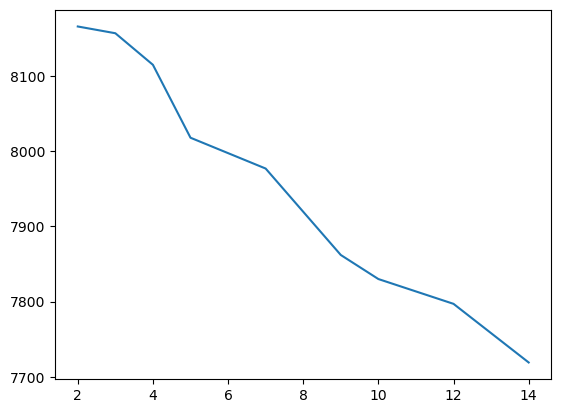

In [47]:
# 1차가 아닌 2차 3차로 항을 높이면서 보간
ebola['Cases_Liberia'].interpolate(method='slinear').plot()

<Axes: >

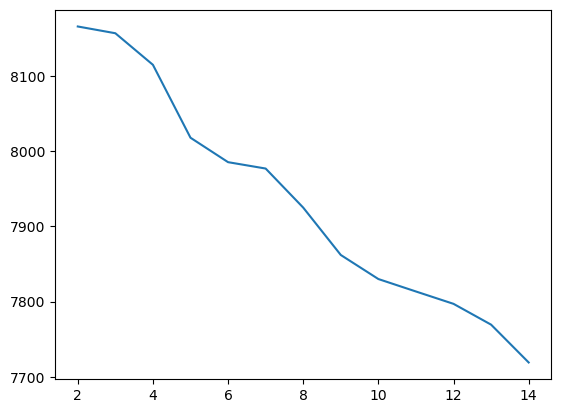

In [48]:
# 1차가 아닌 2차 3차로 항을 높이면서 보간
ebola['Cases_Liberia'].interpolate(method='cubic').plot()
# 차수가 높아질수록 점점 곡선의 형태를 띔

### spline
- 기존에는 1차원 차원으로 생각해서 보간 했다면 spline을 통해 order차수를 높이면 2차원 이상으로 보간

<Axes: >

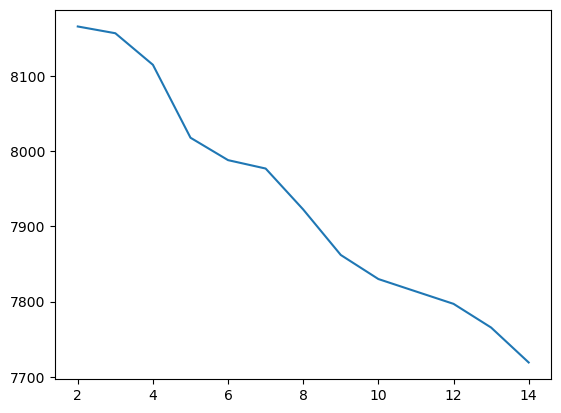

In [51]:
ebola['Cases_Liberia'].interpolate(method='spline',order=2).plot()

In [57]:
dfe['Date']=pd.to_datetime(dfe['Date'])

df_e = dfe.set_index('Date')

In [62]:
df_e.iloc[0:15,0:5]['Cases_Liberia'].interpolate(method='time').to_frame()
# 시간에 따른 결측치
# 시계열로 대체 할 경우 양쪽에 값을 가지고 Na값을 대체함

,Cases_Liberia
Date,
2015-01-05,NaN
2015-01-04,NaN
2015-01-03,8166.000000
2015-01-02,8157.000000
2014-12-31,8115.000000
2014-12-28,8018.000000
2014-12-27,8007.750000
2014-12-24,7977.000000
2014-12-21,7890.750000


### 문법
- fillna(method='') #ffill과 bfill사용 가능
- interpolate(method='')